# 背景介绍

这篇分析针对Kaggle上的泰坦尼克号生存预测这个比赛进行展开，根据性别、姓名、船舱等级、家庭成员等去预测这个乘客能否在泰坦尼克号沉船意外中幸存下来。本篇分析从最重要的性别和船舱等级两个特征开始分析，根据重要性逐项把相关特征加入，这种做法可以避免加入过多噪音和过拟合。

•PassengerID（ID）
•Survived(是否幸存)
•Pclass（船舱等级）
•Name（姓名）
•Sex（性别）
•Age（年龄）
•Parch（直系亲属）
•SibSp（旁系亲属）
•Ticket（船票编号）
•Fare（票价）
•Cabin（船舱编号）
•Embarked（上船的港口编号）

# 数据导入

## 导入相关库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

## 导入训练集数据和测试集数据

In [2]:
df_train = pd.read_csv(r'C:\Users\NIC\Desktop\titanic\train.csv') 
df_test = pd.read_csv(r'C:\Users\NIC\Desktop\titanic\test.csv')
data = pd.concat([df_train, df_test], ignore_index=True)

# 预览数据

#总共1309条记录，12个字段，发现Age/Cabin/Embarked/Fare有缺失值

In [3]:
data.head(4)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# 数据初步分析

#分析训练集的遇难人数和幸存人数的比例，遇难人数比幸存人数多

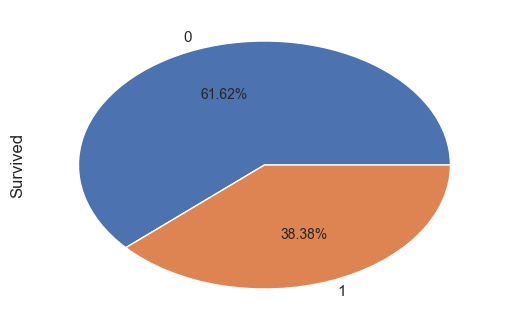

In [5]:
df_train['Survived'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

#分析性别特征，女性幸存比例超过70%，男性幸存比例不到20%，比例相差非常明显，这也是女性优先逃生的一个体现，后面分析会首先把性别特征加入

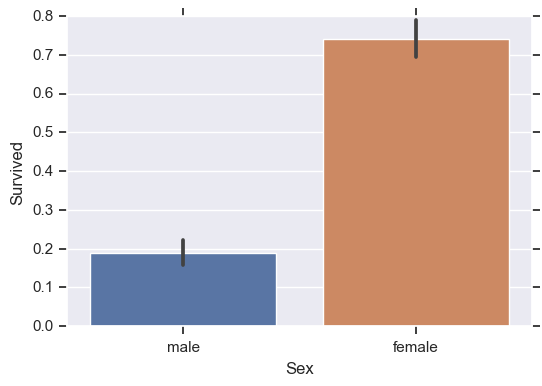

In [6]:
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.show()

#分析船舱等级特征，船舱等级幸存比例也非常明显，表现为等级1 > 等级2 > 等级3，毋庸置疑，社会地位高、经济能力强的人有更充分的信息和更多的逃生途径，首先把它加入特征

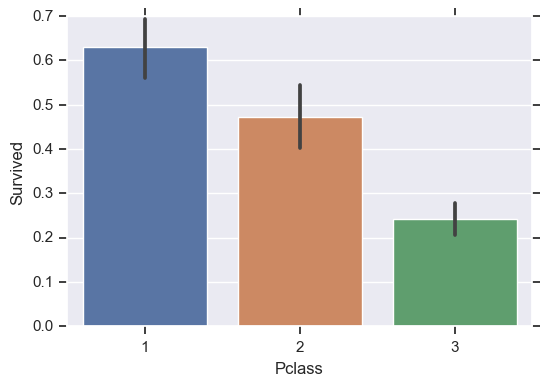

In [7]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.show()

#分析年龄特征，根据年龄对幸存和遇难的比例进行比较，发现0-14岁幸存比例比较高，其它年龄段无太大差别，应该是未成年人优先逃生的缘故

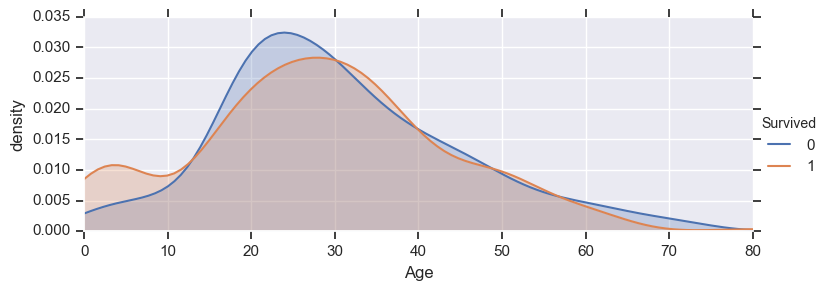

In [8]:
facet = sns.FacetGrid(df_train, hue="Survived",aspect=2.5)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')
plt.show()

#分析登船港口编号特征，登船港口编号只有S/C/Q，港口C幸存比例最高

In [9]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

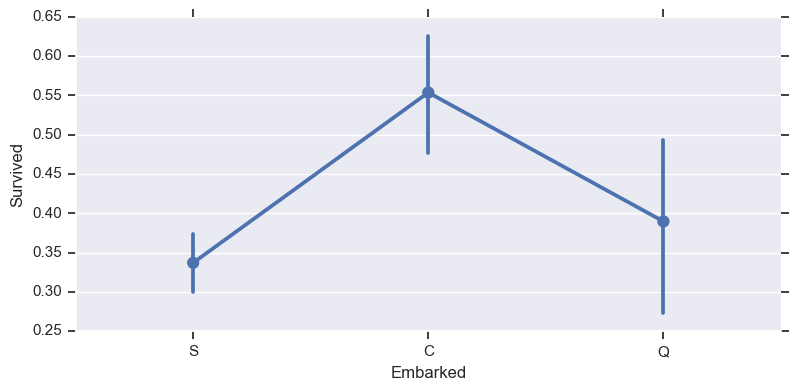

In [10]:
sns.factorplot('Embarked', 'Survived', data=df_train, size=4, aspect=2)
plt.show()

#分析票价特征，幸存人数票价是遇难人数票价的两倍左右

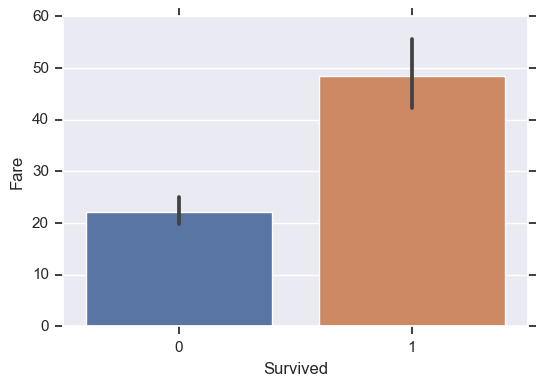

In [11]:
sns.barplot(x='Survived', y='Fare', data=df_train)
plt.show()

#分析姓名特征，出现很多如Mrs/Mr/Don的称呼，对其进行清洗归类，增加一个新的字段名"Title"

In [12]:
df_train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [13]:
data['Title'] = data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [14]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [15]:
Title_dict = {}
Title_dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'],'Officer'))
Title_dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'],'Royalty'))
Title_dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'],'Mrs'))
Title_dict.update(dict.fromkeys(['Mlle', 'Miss'],'Miss'))
Title_dict.update(dict.fromkeys(['Mr'],'Mr'))
Title_dict.update(dict.fromkeys(['Master', 'Jonkheer'],'Master'))

In [16]:
Title_dict

{'Capt': 'Officer',
 'Col': 'Officer',
 'Don': 'Royalty',
 'Dona': 'Royalty',
 'Dr': 'Officer',
 'Jonkheer': 'Master',
 'Lady': 'Royalty',
 'Major': 'Officer',
 'Master': 'Master',
 'Miss': 'Miss',
 'Mlle': 'Miss',
 'Mme': 'Mrs',
 'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Ms': 'Mrs',
 'Rev': 'Officer',
 'Sir': 'Royalty',
 'the Countess': 'Royalty'}

In [17]:
data['Title'] = data['Title'].map(Title_dict)

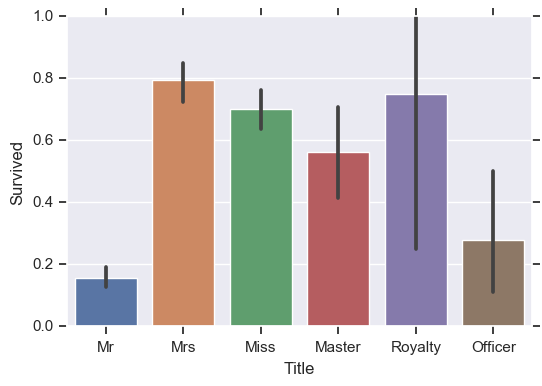

In [18]:
sns.barplot(x='Title', y='Survived', data=data)
plt.show()

#分析直系亲属特征，直系亲属人数在1-3之间幸存比例较高

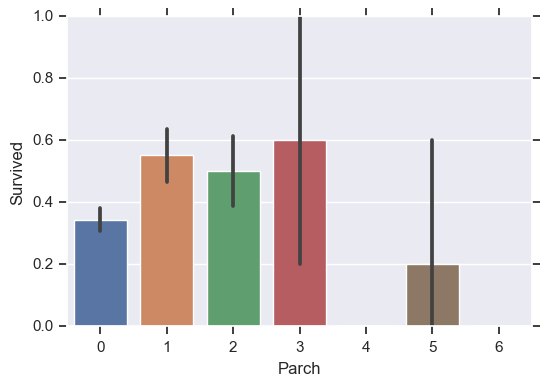

In [19]:
sns.barplot(x='Parch', y='Survived', data=df_train)
plt.show()

#分析旁系亲属特征，旁系亲属人数在0-2之间幸存比例较高

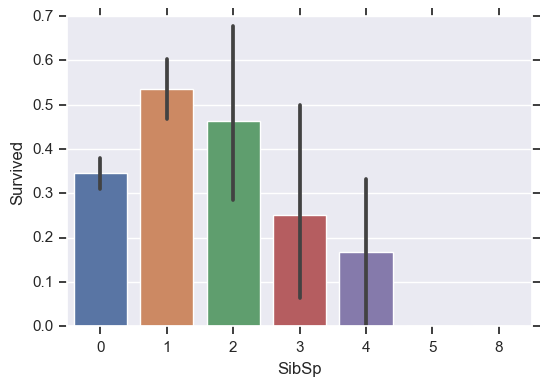

In [20]:
sns.barplot(x='SibSp', y='Survived', data=df_train)
plt.show()

#在这里考虑将直系亲属和旁系亲属加在一起，从图表看来，分层更加明显

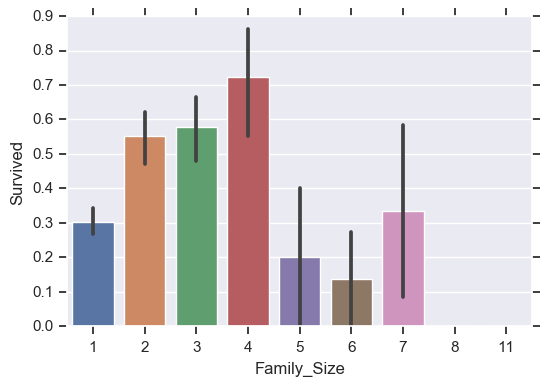

In [21]:
data['Family_Size'] = data['Parch'] + data['SibSp'] + 1
sns.barplot(x='Family_Size', y='Survived', data=data)
plt.show()

#分析船票编号特征，总数有891，唯一值只有681，其中有部分人的船票是共用的

In [22]:
df_train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

# 第一次建模分析

#对性别进行one-hot编码

In [23]:
data['Sex'] = pd.get_dummies(data['Sex'])

#提取训练集，只选中性别和船舱等级两个特征

In [24]:
x = data.loc[0:len(df_train)-1,['Sex', 'Pclass']]

y = data.loc[0:len(df_train)-1,'Survived']

#导入train_test_split和RandomForestClassifier

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#进行交叉验证

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
rfc = RandomForestClassifier(n_estimators=400, oob_score=True, random_state=22)

#进行模型训练

In [27]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=True, random_state=22, verbose=0, warm_start=False)

#得到oob_score分数

In [28]:
rfc.oob_score_

0.773876404494382

#根据模型对测试集进行预测

In [29]:
y_pred = rfc.predict(data.loc[len(df_train):,['Sex','Pclass']])

In [30]:
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred.astype(int)})

In [31]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


### 第一次提交结果，Kaggle得分0.75598分

# 第二次建模分析

#加入登船港口编号特征，有2个缺失值

In [32]:
data[data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,1.0,0,1.0,113572,Miss,1
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,1.0,0,1.0,113572,Mrs,1


#两个缺失值的票价和船舱等级分别是80和1，所以用"S"填补

In [33]:
data.groupby(by=['Pclass', 'Embarked']).Fare.mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [34]:
data['Embarked'].fillna('S', inplace=True)

#特征转换

In [35]:
data['Embarked'] = data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

#提取训练集，选中性别、船舱等级和港口编号三个特征

In [36]:
x = data.loc[0:len(df_train)-1,['Sex', 'Pclass', 'Embarked']]

y = data.loc[0:len(df_train)-1,'Survived']

#导入train_test_split和RandomForestClassifier

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#进行交叉验证

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
rfc = RandomForestClassifier(n_estimators=400, oob_score=True, random_state=44)

#进行模型训练

In [39]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=True, random_state=44, verbose=0, warm_start=False)

#得到oob_score分数

In [40]:
rfc.oob_score_

0.8089887640449438

#根据模型对测试集进行预测

In [41]:
y_pred = rfc.predict(data.loc[len(df_train):,['Sex','Pclass','Embarked']])

In [42]:
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred.astype(int)})

In [43]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### 第二次提交结果，Kaggle得分0.77990分

# 第三次建模分析

#特征转换

In [44]:
data['Title'],_= pd.factorize(data['Title'])

#提取训练集，选中性别、船舱等级、港口编号和头衔四个特征

In [45]:
x = data.loc[0:len(df_train)-1,['Sex', 'Pclass', 'Embarked', 'Title']]

y = data.loc[0:len(df_train)-1,'Survived']

#导入train_test_split和RandomForestClassifier

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#进行交叉验证

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)
rfc = RandomForestClassifier(n_estimators=400, oob_score=True, random_state=66)

#进行模型训练

In [48]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=True, random_state=66, verbose=0, warm_start=False)

#得到oob_score分数

In [49]:
rfc.oob_score_

0.8356741573033708

#根据模型对测试集进行预测

In [50]:
y_pred = rfc.predict(data.loc[len(df_train):,['Sex','Pclass','Embarked','Title']])

In [51]:
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred.astype(int)})

In [52]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### 第三次提交结果，Kaggle得分0.78947分

# 第四次建模分析

#根据亲属总人数，重新分组，新编字段"Family_Size"

In [53]:
def family_label(x):
    if (x >= 2) & (x <= 4):
        return 0
    elif (x == 1) | (x > 4) & (x <= 7):
        return 1
    elif (x > 7):
        return 3
data['Family_Label'] = data['Family_Size'].map(family_label)

#提取训练集，选中五个特征

In [54]:
x = data.loc[0:len(df_train)-1,['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Label']]

y = data.loc[0:len(df_train)-1,'Survived']

#导入train_test_split和RandomForestClassifier

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#进行交叉验证

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)
rfc = RandomForestClassifier(n_estimators=400, oob_score=True, random_state=88)

#进行模型训练

In [57]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=True, random_state=88, verbose=0, warm_start=False)

#得到oob_score分数

In [58]:
rfc.oob_score_

0.8146067415730337

#根据模型对测试集进行预测

In [59]:
y_pred = rfc.predict(data.loc[len(df_train):,['Sex','Pclass','Embarked','Title', 'Family_Label']])

In [60]:
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred.astype(int)})

In [61]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [62]:
results = submission.to_csv(r'C:\Users\NIC\Desktop\titanic\results\Titanic.csv',index=False)

#### 第四次提交结果，Kaggle得分0.80382分，排名Top13%